In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# Get CSV file
zoo = pd.read_csv(os.path.join('Resources', 'zoo.csv'))
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,class
0,Aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,Adder,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3,Reptile
2,Alcatrazes Tree Frog,0,0,1,0,0,1,0,0,1,1,0,0,4,0,0,0,5,Amphibian
3,Alligator,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3,Reptile
4,Amazon River Dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
208,Woolly Monkey,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1,Mammal
209,Worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,Invertebrate
210,Wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2,Bird


In [3]:
zoo_df=zoo.set_index('animal_name')
zoo_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,class
animal_name,,,,,,,,,,,,,,,,,,
Aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
Adder,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3,Reptile
Alcatrazes Tree Frog,0,0,1,0,0,1,0,0,1,1,0,0,4,0,0,0,5,Amphibian
Alligator,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3,Reptile
Amazon River Dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
Woolly Monkey,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1,Mammal
Worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,Invertebrate


In [4]:
# Data Summary
zoo_df["class"].value_counts()

Mammal          59
Bird            40
Fish            28
Bug             25
Reptile         24
Invertebrate    20
Amphibian       16
Name: class, dtype: int64

In [5]:
# Data for predictions
kangaroo = np.array([[1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1]])
bald_eagle = np.array([[0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0]])
rattle_snake = np.array([[0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,]])
goldfish = np.array([[0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0]])
mountain_chicken_frog = np.array([[0,0,1,0,0,1,1,0,1,1,0,0,4,0,0,0]])
vampire_moth = np.array([[0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0]])
coral = np.array([[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]])
sea_turtle = np.array([[0,0,1,0,0,1,1,0,1,0,0,1,4,1,0,1]])

In [6]:
# Assign X and y
X = zoo_df.drop(["class_type","class"], axis=1)
y = zoo_df["class_type"]
print (X.shape, y.shape)

(212, 16) (212,)


In [7]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=500)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [9]:
print(f"Training score: {classifier.score(X_train, y_train)}")
print(f"Testing score: {classifier.score(X_test, y_test)}")

Training score: 0.9748427672955975
Testing score: 0.9245283018867925


In [10]:
print(f"Predictions")
print(f"Kangaroo: {classifier.predict(kangaroo)}")
print(f"Bald Eagle: {classifier.predict(bald_eagle)}")
print(f"Rattle Snake: {classifier.predict(rattle_snake)}")
print(f"Goldfish: {classifier.predict(goldfish)}")
print(f"Mountain Chicken Frog: {classifier.predict(mountain_chicken_frog)}")
print(f"Vampire Moth: {classifier.predict(vampire_moth)}")
print(f"Coral: {classifier.predict(coral)}")
print(f"Sea Turtle: {classifier.predict(sea_turtle)}")

Predictions
Kangaroo: [1]
Bald Eagle: [2]
Rattle Snake: [3]
Goldfish: [4]
Mountain Chicken Frog: [5]
Vampire Moth: [6]
Coral: [7]
Sea Turtle: [4]


In [11]:
predictions_logreg = classifier.predict(X_test)
class_predictions_table = pd.DataFrame({"Prediction": predictions_logreg, "Actual": y_test})
class_predictions_table.head()

,Prediction,Actual
animal_name,,
Crow,2,2
Toad,5,5
Dragonfly,6,6
Kiwi,2,2
Chub,4,4


In [12]:
importances_logreg = classifier.coef_
importances_logreg

array([[ 1.35385234, -0.25008143, -1.56628265,  1.8619026 , -0.14013205,
        -0.27057982,  0.15184022,  0.4984894 ,  0.26120718,  0.2900319 ,
        -0.29800694,  0.30060237,  0.03685837,  0.29798843,  0.01368488,
         0.5613434 ],
       [-0.20856092,  2.13306247,  0.18284254, -0.19696279,  1.08498404,
        -0.36689267,  0.07131276, -0.98454643,  0.56859717,  0.33946567,
        -0.2790507 , -0.30807707, -0.25655509,  0.4830332 , -0.07770765,
         0.31925517],
       [-0.73690813, -0.9617945 ,  0.29419346, -0.77601756, -0.62236276,
        -0.6302798 ,  0.60261997,  0.82531052,  0.5749439 ,  0.35944919,
         0.4658056 , -1.0199483 , -0.05209485,  1.3136969 ,  0.36488512,
         0.27451784],
       [-0.05310927, -0.1727451 ,  0.62575669, -0.36673298, -0.11964894,
         0.70630102, -0.1692353 ,  0.29701207,  0.42447134, -1.15416647,
        -0.26400029,  1.56744422, -0.91452622,  0.49955961,  0.02287432,
         0.16942346],
       [-0.34004742, -0.29624206,  0

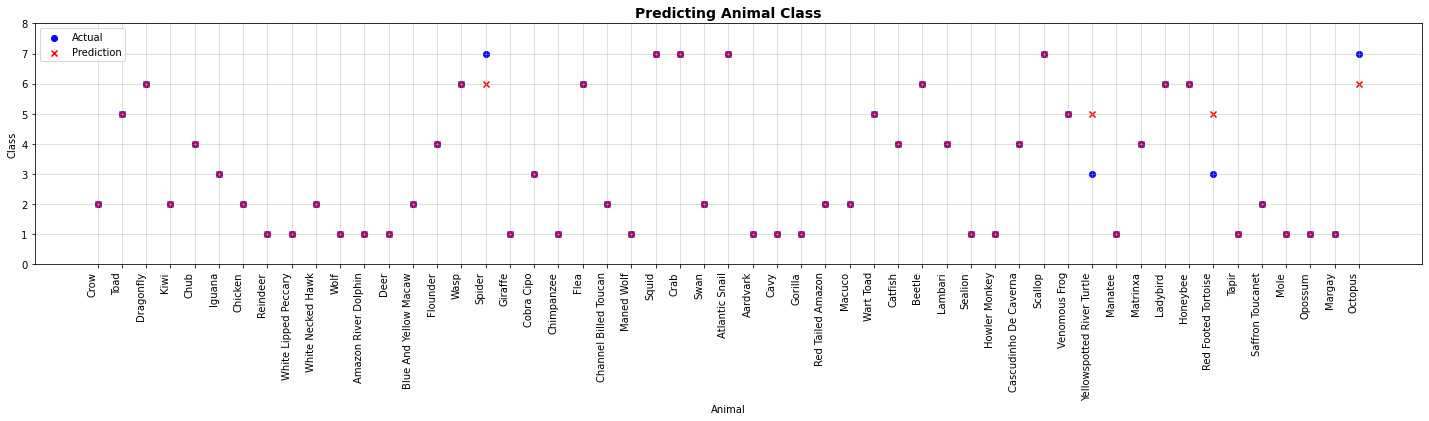

In [13]:
#Create the scatter plot of actual and predictions
fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.ylim(0, 8)
plt.xticks(rotation=90, ha='right')

plt.scatter(class_predictions_table.index, class_predictions_table.Actual, marker='o', color='b', label='Actual')
plt.scatter(class_predictions_table.index, class_predictions_table.Prediction, marker='x', color='r', label='Prediction')

plt.title('Predicting Animal Class',color='k', size=14, weight='bold')
plt.xlabel("Animal")
plt.ylabel('Class')
plt.legend(loc="best")
plt.grid(alpha=0.5)

# plt.savefig('resources/logreg.png', dpi=fig.dpi)
plt.show()


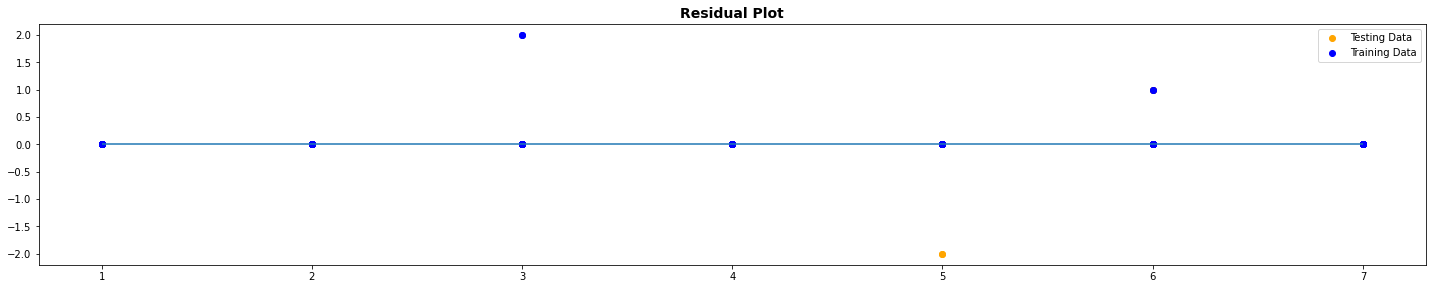

In [47]:
#Plot Residuals
xtest_shaped = predictions_logreg.reshape(-1, 1)
ytest_shaped = y_test.values.reshape(-1,1)

xtrain = classifier.predict(X_train)
xtrain_shaped = xtrain.reshape(-1, 1)
ytrain_shaped = y_train.values.reshape(-1,1)

fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)

plt.scatter(xtest_shaped, ytest_shaped - xtest_shaped, c="orange", label="Testing Data")
plt.scatter(xtrain_shaped, ytrain_shaped - xtrain_shaped, c="blue", label="Training Data")
plt.legend()
plt.hlines(y=0, xmin=xtest_shaped.min(), xmax=xtest_shaped.max())
plt.title('Residual Plot',color='k', size=14, weight='bold')

plt.savefig('resources/residual.png', dpi=fig.dpi)
plt.show()

#### Logistic Regression Scaled

In [15]:
# Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
classifier_scaled = LogisticRegression(max_iter=500)
classifier_scaled.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [17]:
print(f"Training score: {classifier_scaled.score(X_train_scaled, y_train)}")
print(f"Testing score: {classifier_scaled.score(X_test_scaled, y_test)}")

Training score: 0.9811320754716981
Testing score: 0.9433962264150944


In [18]:
print(f"Predictions")
print(f"Kangaroo: {classifier_scaled.predict(kangaroo)}")
print(f"Bald Eagle: {classifier_scaled.predict(bald_eagle)}")
print(f"Rattle Snake: {classifier_scaled.predict(rattle_snake)}")
print(f"Goldfish: {classifier_scaled.predict(goldfish)}")
print(f"Mountain Chicken Frog: {classifier_scaled.predict(mountain_chicken_frog)}")
print(f"Vampire Moth: {classifier_scaled.predict(vampire_moth)}")
print(f"Coral: {classifier_scaled.predict(coral)}")
print(f"Sea Turtle: {classifier_scaled.predict(sea_turtle)}")

Predictions
Kangaroo: [1]
Bald Eagle: [2]
Rattle Snake: [3]
Goldfish: [4]
Mountain Chicken Frog: [6]
Vampire Moth: [6]
Coral: [7]
Sea Turtle: [6]


In [19]:
predictions_logreg_scaled = classifier_scaled.predict(X_test)
class_predictions_table_scaled = pd.DataFrame({"Prediction": predictions_logreg_scaled, "Actual": y_test})
class_predictions_table_scaled.head()

,Prediction,Actual
animal_name,,
Crow,2,2
Toad,5,5
Dragonfly,6,6
Kiwi,2,2
Chub,4,4


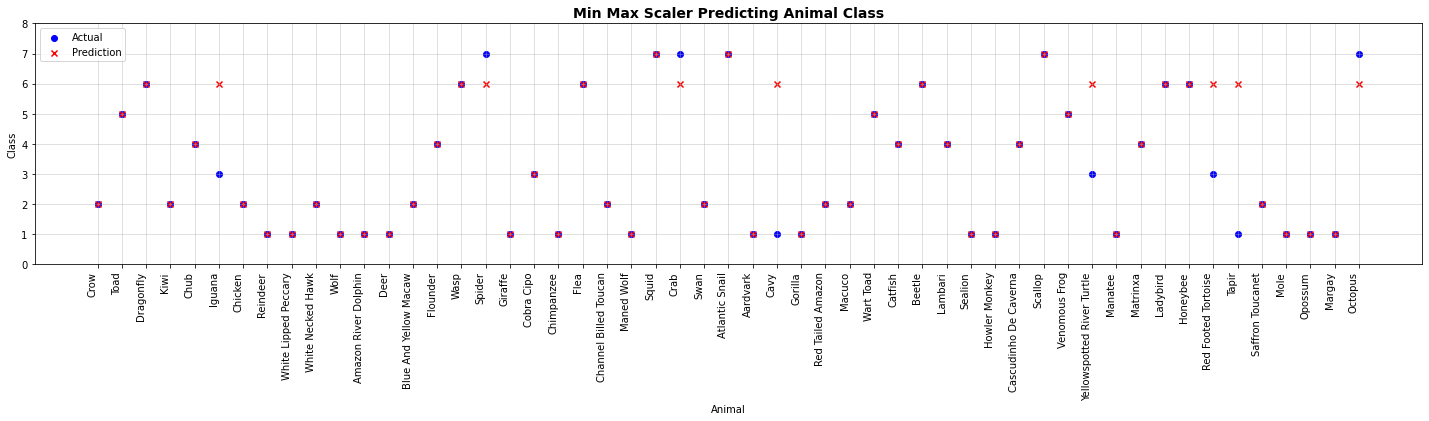

In [20]:
#Create the scatter plot of actual and predictions
fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)

plt.ylim(0, 8)
plt.xticks(rotation=90, ha='right')
plt.scatter(class_predictions_table_scaled.index, class_predictions_table_scaled.Actual, marker='o', color='b', label='Actual')
plt.scatter(class_predictions_table_scaled.index, class_predictions_table_scaled.Prediction, marker='x', color='r', label='Prediction')
plt.title('Min Max Scaler Predicting Animal Class',color='k', size=14, weight='bold')
plt.xlabel("Animal")
plt.ylabel('Class')
plt.legend(loc="best")
plt.grid(alpha=0.5)

# plt.savefig('resources/minmaxlogreg.png', dpi=fig.dpi)
plt.show()

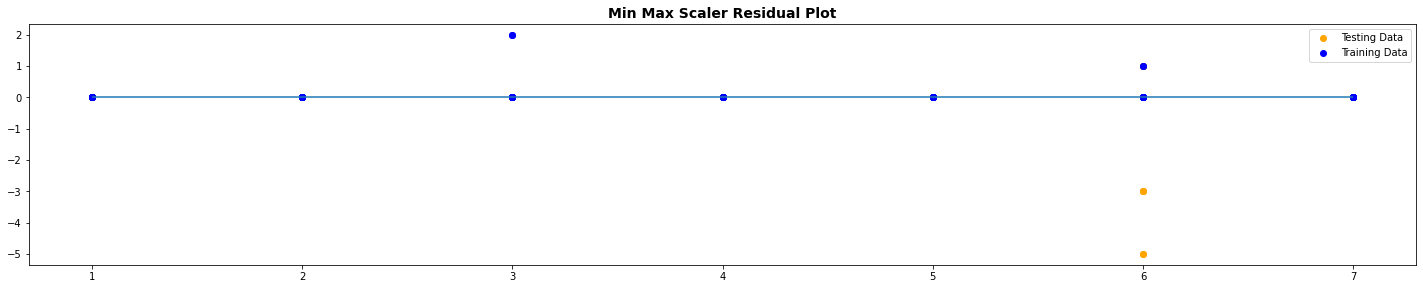

In [48]:
#Plot Residuals
xtest_shaped = predictions_logreg_scaled.reshape(-1, 1)
ytest_shaped = y_test.values.reshape(-1,1)

xtrain = classifier.predict(X_train)
xtrain_shaped = xtrain.reshape(-1, 1)
ytrain_shaped = y_train.values.reshape(-1,1)

fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)

plt.scatter(xtest_shaped, ytest_shaped - xtest_shaped, c="orange", label="Testing Data")
plt.scatter(xtrain_shaped, ytrain_shaped - xtrain_shaped, c="blue", label="Training Data")
plt.legend()
plt.hlines(y=0, xmin=xtest_shaped.min(), xmax=xtest_shaped.max())
plt.title('Min Max Scaler Residual Plot',color='k', size=14, weight='bold')

plt.savefig('resources/minmaxresidual.png', dpi=fig.dpi)
plt.show()

### Random Forest 

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9874213836477987

In [23]:
print(f"Training score: {rf.score(X_train, y_train)}")
print(f"Testing score: {rf.score(X_test, y_test)}")

Training score: 0.9874213836477987
Testing score: 0.9433962264150944


In [24]:
print(f"Predictions")
print(f"Kangaroo: {rf.predict(kangaroo)}")
print(f"Bald Eagle: {rf.predict(bald_eagle)}")
print(f"Rattle Snake: {rf.predict(rattle_snake)}")
print(f"Goldfish: {rf.predict(goldfish)}")
print(f"Mountain Chicken Frog: {rf.predict(mountain_chicken_frog)}")
print(f"Vampire Moth: {rf.predict(vampire_moth)}")
print(f"Coral: {rf.predict(coral)}")
print(f"Sea Turtle: {rf.predict(sea_turtle)}")

Predictions
Kangaroo: [1]
Bald Eagle: [2]
Rattle Snake: [3]
Goldfish: [4]
Mountain Chicken Frog: [5]
Vampire Moth: [6]
Coral: [7]
Sea Turtle: [4]


In [25]:
predictions_rf = rf.predict(X_test)
rf_predictions_table = pd.DataFrame({"Prediction": predictions_rf, "Actual": y_test})
rf_predictions_table.head()

,Prediction,Actual
animal_name,,
Crow,2,2
Toad,5,5
Dragonfly,6,6
Kiwi,2,2
Chub,4,4


In [26]:
importances_rf = rf.feature_importances_
importances_rf

array([0.06207352, 0.13952744, 0.1137072 , 0.08817967, 0.04171246,
       0.04977686, 0.01809262, 0.0434737 , 0.07899112, 0.05997557,
       0.01334587, 0.07312637, 0.12784537, 0.06996998, 0.00434175,
       0.0158605 ])

#### Random Forest Scaled

In [27]:
rf_scaled = RandomForestClassifier(n_estimators=100)
rf_scaled = rf_scaled.fit(X_train_scaled, y_train)
rf_scaled.score(X_train_scaled, y_train)

0.9874213836477987

In [28]:
print(f"Training score: {rf_scaled.score(X_train_scaled, y_train)}")
print(f"Testing score: {rf_scaled.score(X_test_scaled, y_test)}")

Training score: 0.9874213836477987
Testing score: 0.9433962264150944


In [29]:
print(f"Predictions")
print(f"Kangaroo: {rf_scaled.predict(kangaroo)}")
print(f"Bald Eagle: {rf_scaled.predict(bald_eagle)}")
print(f"Rattle Snake: {rf_scaled.predict(rattle_snake)}")
print(f"Goldfish: {rf_scaled.predict(goldfish)}")
print(f"Mountain Chicken Frog: {rf_scaled.predict(mountain_chicken_frog)}")
print(f"Vampire Moth: {rf_scaled.predict(vampire_moth)}")
print(f"Coral: {rf_scaled.predict(coral)}")
print(f"Sea Turtle: {rf_scaled.predict(sea_turtle)}")

Predictions
Kangaroo: [1]
Bald Eagle: [2]
Rattle Snake: [3]
Goldfish: [4]
Mountain Chicken Frog: [5]
Vampire Moth: [6]
Coral: [7]
Sea Turtle: [4]


In [30]:
predictions_rf_scaled = rf_scaled.predict(X_test)
rf_scaled_predictions_table = pd.DataFrame({"Prediction": predictions_rf_scaled, "Actual": y_test})
rf_scaled_predictions_table.head()

,Prediction,Actual
animal_name,,
Crow,2,2
Toad,5,5
Dragonfly,6,6
Kiwi,2,2
Chub,4,4


### K Nearest Neighbor

In [31]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 0.987/0.962
k: 3, Train/Test Score: 0.956/0.943
k: 5, Train/Test Score: 0.962/0.943
k: 7, Train/Test Score: 0.918/0.925
k: 9, Train/Test Score: 0.912/0.887
k: 11, Train/Test Score: 0.918/0.887
k: 13, Train/Test Score: 0.906/0.887
k: 15, Train/Test Score: 0.899/0.849
k: 17, Train/Test Score: 0.899/0.849
k: 19, Train/Test Score: 0.836/0.830


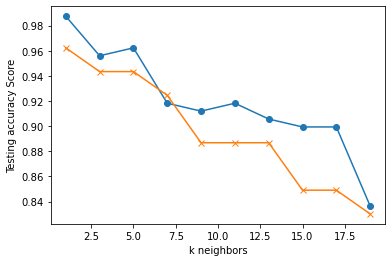

In [32]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [33]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print('k=11 Train Acc: %.3f' % knn.score(X_train, y_train))
print('k=11 Test Acc: %.3f' % knn.score(X_test, y_test))

k=11 Train Acc: 0.918
k=11 Test Acc: 0.887


In [34]:
print(f"Predictions")
print(f"Kangaroo: {knn.predict(kangaroo)}")
print(f"Bald Eagle: {knn.predict(bald_eagle)}")
print(f"Rattle Snake: {knn.predict(rattle_snake)}")
print(f"Goldfish: {knn.predict(goldfish)}")
print(f"Mountain Chicken Frog: {knn.predict(mountain_chicken_frog)}")
print(f"Vampire Moth: {knn.predict(vampire_moth)}")
print(f"Coral: {knn.predict(coral)}")
print(f"Sea Turtle: {knn.predict(sea_turtle)}")

Predictions
Kangaroo: [1]
Bald Eagle: [2]
Rattle Snake: [3]
Goldfish: [4]
Mountain Chicken Frog: [5]
Vampire Moth: [6]
Coral: [7]
Sea Turtle: [3]


In [35]:
predictions_knn = knn.predict(X_test)
knn_predictions_table = pd.DataFrame({"Prediction": predictions_knn, "Actual": y_test})
knn_predictions_table.head()

,Prediction,Actual
animal_name,,
Crow,2,2
Toad,5,5
Dragonfly,6,6
Kiwi,2,2
Chub,4,4


In [36]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67         4
           4       0.86      1.00      0.92         6
           5       0.50      1.00      0.67         3
           6       0.75      1.00      0.86         6
           7       1.00      0.50      0.67         6

    accuracy                           0.89        53
   macro avg       0.87      0.85      0.82        53
weighted avg       0.93      0.89      0.88        53



#### K Nearest Neighbor Scaled

In [37]:
train_scores_scaled = []
test_scores_scaled = []
for k in range(1, 20, 2):
    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)
    train_score_scaled = knn_scaled.score(X_train_scaled, y_train)
    test_score_scaled = knn_scaled.score(X_test_scaled, y_test)
    train_scores_scaled.append(train_score_scaled)
    test_scores_scaled.append(test_score_scaled)
    print(f"k: {k}, Train/Test Score: {train_score_scaled:.3f}/{test_score_scaled:.3f}")

k: 1, Train/Test Score: 0.987/0.962
k: 3, Train/Test Score: 0.969/0.943
k: 5, Train/Test Score: 0.962/0.943
k: 7, Train/Test Score: 0.950/0.943
k: 9, Train/Test Score: 0.937/0.887
k: 11, Train/Test Score: 0.931/0.906
k: 13, Train/Test Score: 0.918/0.906
k: 15, Train/Test Score: 0.906/0.906
k: 17, Train/Test Score: 0.931/0.925
k: 19, Train/Test Score: 0.925/0.906


In [38]:
knn_scaled = KNeighborsClassifier(n_neighbors=11)
knn_scaled.fit(X_train_scaled, y_train)
print('k=11 Train Acc: %.3f' % knn_scaled.score(X_train_scaled, y_train))
print('k=11 Test Acc: %.3f' % knn_scaled.score(X_test_scaled, y_test))

k=11 Train Acc: 0.931
k=11 Test Acc: 0.906


In [39]:
print(f"Predictions")
print(f"Kangaroo: {knn_scaled.predict(kangaroo)}")
print(f"Bald Eagle: {knn_scaled.predict(bald_eagle)}")
print(f"Rattle Snake: {knn_scaled.predict(rattle_snake)}")
print(f"Goldfish: {knn_scaled.predict(goldfish)}")
print(f"Mountain Chicken Frog: {knn_scaled.predict(mountain_chicken_frog)}")
print(f"Vampire Moth: {knn_scaled.predict(vampire_moth)}")
print(f"Coral: {knn_scaled.predict(coral)}")
print(f"Sea Turtle: {knn_scaled.predict(sea_turtle)}")

Predictions
Kangaroo: [1]
Bald Eagle: [2]
Rattle Snake: [3]
Goldfish: [4]
Mountain Chicken Frog: [7]
Vampire Moth: [6]
Coral: [7]
Sea Turtle: [3]


In [40]:
# Classification Report
predictions_knn_scaled = knn_scaled.predict(X_test_scaled)
print(classification_report(y_test, predictions_knn_scaled))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67         4
           4       0.86      1.00      0.92         6
           5       0.60      1.00      0.75         3
           6       0.75      1.00      0.86         6
           7       1.00      0.67      0.80         6

    accuracy                           0.91        53
   macro avg       0.89      0.87      0.85        53
weighted avg       0.93      0.91      0.90        53



In [43]:
predictions_knn_scaled = knn_scaled.predict(X_test)
knn_scaled_predictions_table = pd.DataFrame({"Prediction": predictions_knn_scaled, "Actual": y_test})
knn_scaled_predictions_table.head()

,Prediction,Actual
animal_name,,
Crow,2,2
Toad,5,5
Dragonfly,6,6
Kiwi,2,2
Chub,4,4


### Support Vector Machine

In [49]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

print('Train Acc: %.3f' % svm_model.score(X_train, y_train))
print('Test Acc: %.3f' % svm_model.score(X_test, y_test))

Train Acc: 0.981
Test Acc: 0.943


In [50]:
predictions_svm = svm_model.predict(X_test)
print(classification_report(y_test, predictions_svm,
                            target_names=["1","2","3","4","5","6","7"]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         6
           5       0.60      1.00      0.75         3
           6       0.86      1.00      0.92         6
           7       1.00      0.83      0.91         6

    accuracy                           0.94        53
   macro avg       0.92      0.90      0.89        53
weighted avg       0.96      0.94      0.94        53



In [51]:
#Train the parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid_svm = GridSearchCV(svm_model, param_grid, verbose=3)

grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.938, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=1.000, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.906, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.969, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.935, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.938, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=5, gamma=0.001, score=0.938, total=   0.1s
[CV] C=5, gamma=0.001 ................................................
[CV] .................... C=5, gamma=0.001, score=0.969, total=   0.0s
[CV] C=5, gamma=0.001 ................................................
[CV] .................... C=5, gamma=0.001, score=0.875, total=   0.0s
[CV] C=5, gamma=0.001 ................................................
[CV] .................... C=5, gamma=0.001, score=0.969, total=   0.0s
[CV] C=5, gamma=0.001 ................................................
[CV] .................... C=5, gamma=0.001, score=0.968, total=   0.0s
[CV] C=5, gamma=0.005 ................................................
[CV] .................... C=5, gamma=0.005, score=0.938, total=   0.0s
[CV] C=5, gamma=0.005 ................................................
[CV] .................... C=5, gamma=0.005, score=0.969, total=   0.0s
[CV] C=5, gamma=0.005 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.5s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [52]:
print(grid_svm.best_params_)
print(grid_svm.best_score_)


{'C': 1, 'gamma': 0.0001}
0.9495967741935484


In [53]:
print(f"Predictions")
print(f"Kangaroo: {grid_svm.predict(kangaroo)}")
print(f"Bald Eagle: {grid_svm.predict(bald_eagle)}")
print(f"Rattle Snake: {grid_svm.predict(rattle_snake)}")
print(f"Goldfish: {grid_svm.predict(goldfish)}")
print(f"Mountain Chicken Frog: {grid_svm.predict(mountain_chicken_frog)}")
print(f"Vampire Moth: {grid_svm.predict(vampire_moth)}")
print(f"Coral: {grid_svm.predict(coral)}")
print(f"Sea Turtle: {grid_svm.predict(sea_turtle)}")

Predictions
Kangaroo: [1]
Bald Eagle: [2]
Rattle Snake: [3]
Goldfish: [4]
Mountain Chicken Frog: [5]
Vampire Moth: [6]
Coral: [7]
Sea Turtle: [3]


In [54]:
svm_predictions_table = pd.DataFrame({"Prediction": predictions_svm, "Actual": y_test})
svm_predictions_table.head()

,Prediction,Actual
animal_name,,
Crow,2,2
Toad,5,5
Dragonfly,6,6
Kiwi,2,2
Chub,4,4


#### Support Vector Machine Scaled

In [55]:
svm_model_scaled = SVC(kernel='linear')
svm_model_scaled.fit(X_train_scaled, y_train)

print('Train Acc: %.3f' % svm_model_scaled.score(X_train_scaled, y_train))
print('Test Acc: %.3f' % svm_model_scaled.score(X_test_scaled, y_test))

Train Acc: 0.969
Test Acc: 0.943


In [56]:
predictions_svm_scaled = svm_model_scaled.predict(X_test_scaled)
print(classification_report(y_test, predictions_svm_scaled,
                            target_names=["1","2","3","4","5","6","7"]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         6
           5       0.60      1.00      0.75         3
           6       0.86      1.00      0.92         6
           7       1.00      0.83      0.91         6

    accuracy                           0.94        53
   macro avg       0.92      0.90      0.89        53
weighted avg       0.96      0.94      0.94        53



In [57]:
#Train the parameters
param_grid_scaled = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid_svm_scaled = GridSearchCV(svm_model, param_grid, verbose=3)

grid_svm_scaled.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.969, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.938, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.875, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.969, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.935, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.969, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [58]:
print(grid_svm_scaled.best_params_)
print(grid_svm_scaled.best_score_)

{'C': 5, 'gamma': 0.0001}
0.9560483870967742


In [59]:
print(f"Predictions")
print(f"Kangaroo: {grid_svm_scaled.predict(kangaroo)}")
print(f"Bald Eagle: {grid_svm_scaled.predict(bald_eagle)}")
print(f"Rattle Snake: {grid_svm_scaled.predict(rattle_snake)}")
print(f"Goldfish: {grid_svm_scaled.predict(goldfish)}")
print(f"Mountain Chicken Frog: {grid_svm_scaled.predict(mountain_chicken_frog)}")
print(f"Vampire Moth: {grid_svm_scaled.predict(vampire_moth)}")
print(f"Coral: {grid_svm_scaled.predict(coral)}")
print(f"Sea Turtle: {grid_svm_scaled.predict(sea_turtle)}")

Predictions
Kangaroo: [1]
Bald Eagle: [2]
Rattle Snake: [3]
Goldfish: [4]
Mountain Chicken Frog: [5]
Vampire Moth: [6]
Coral: [7]
Sea Turtle: [3]


In [60]:
svm_scaled_predictions_table = pd.DataFrame({"Prediction": predictions_svm_scaled, "Actual": y_test})
svm_scaled_predictions_table.head()

,Prediction,Actual
animal_name,,
Crow,2,2
Toad,5,5
Dragonfly,6,6
Kiwi,2,2
Chub,4,4
